In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read csv file
customer_data = pd.read_csv("hw_1_customers.csv")

# Part 1

In [130]:
#Info of the Customer Dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [131]:
customer_data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [132]:
#take gender data
gender_data = pd.DataFrame(customer_data["Gender"])
#count Male & Female   #by caculate frequency of data multiple data length
count_Male = gender_data.value_counts(normalize=True)["Male"] * len(gender_data)
count_Female = gender_data.value_counts(normalize=True)["Female"] * len(gender_data)
print("Male: ",round(count_Male))
print("Female: ",round(count_Female))

#男女人數

Male:  814
Female:  1186


In [133]:
print("Unique values in the Profession column : ",len(customer_data["Profession"].unique()))
# Profession Counts
customer_data["Profession"].value_counts()

#各職業人數 

Unique values in the Profession column :  10


Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Unique values in the Age column :  100


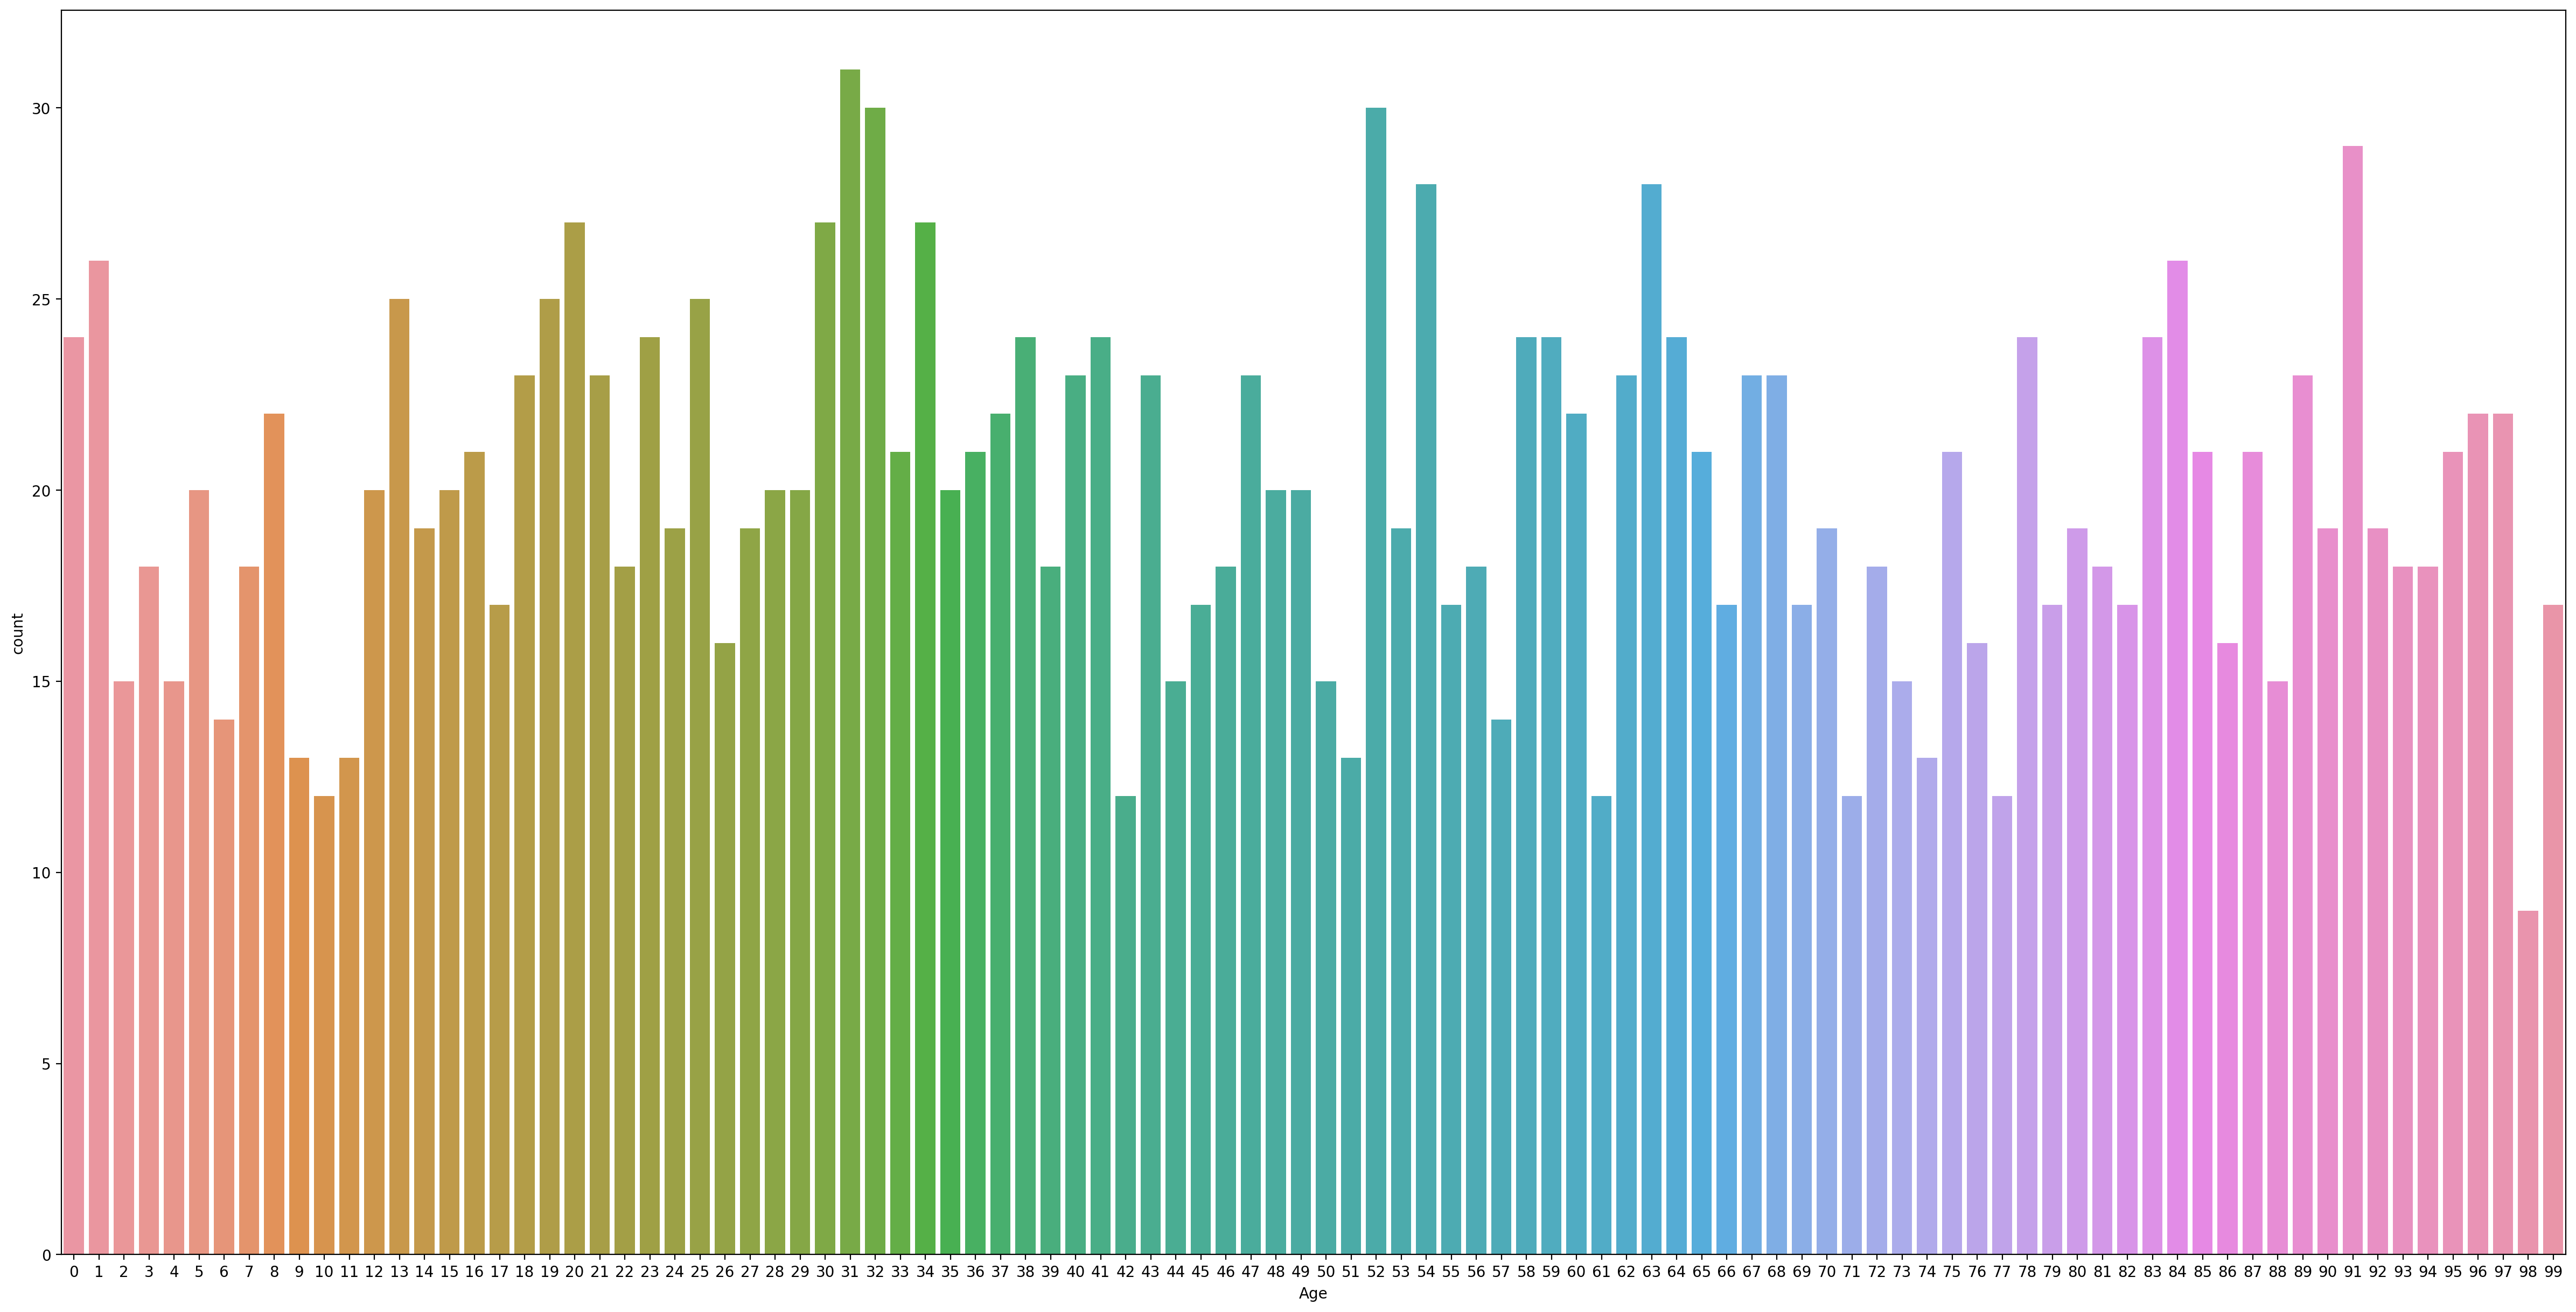

In [134]:
#unique value 非重複數據數量
print("Unique values in the Age column : ",len(customer_data["Age"].unique()))

#customer_data["Age"].value_counts()
# Count Plot based on the Age
plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Age");

#各年齡人數

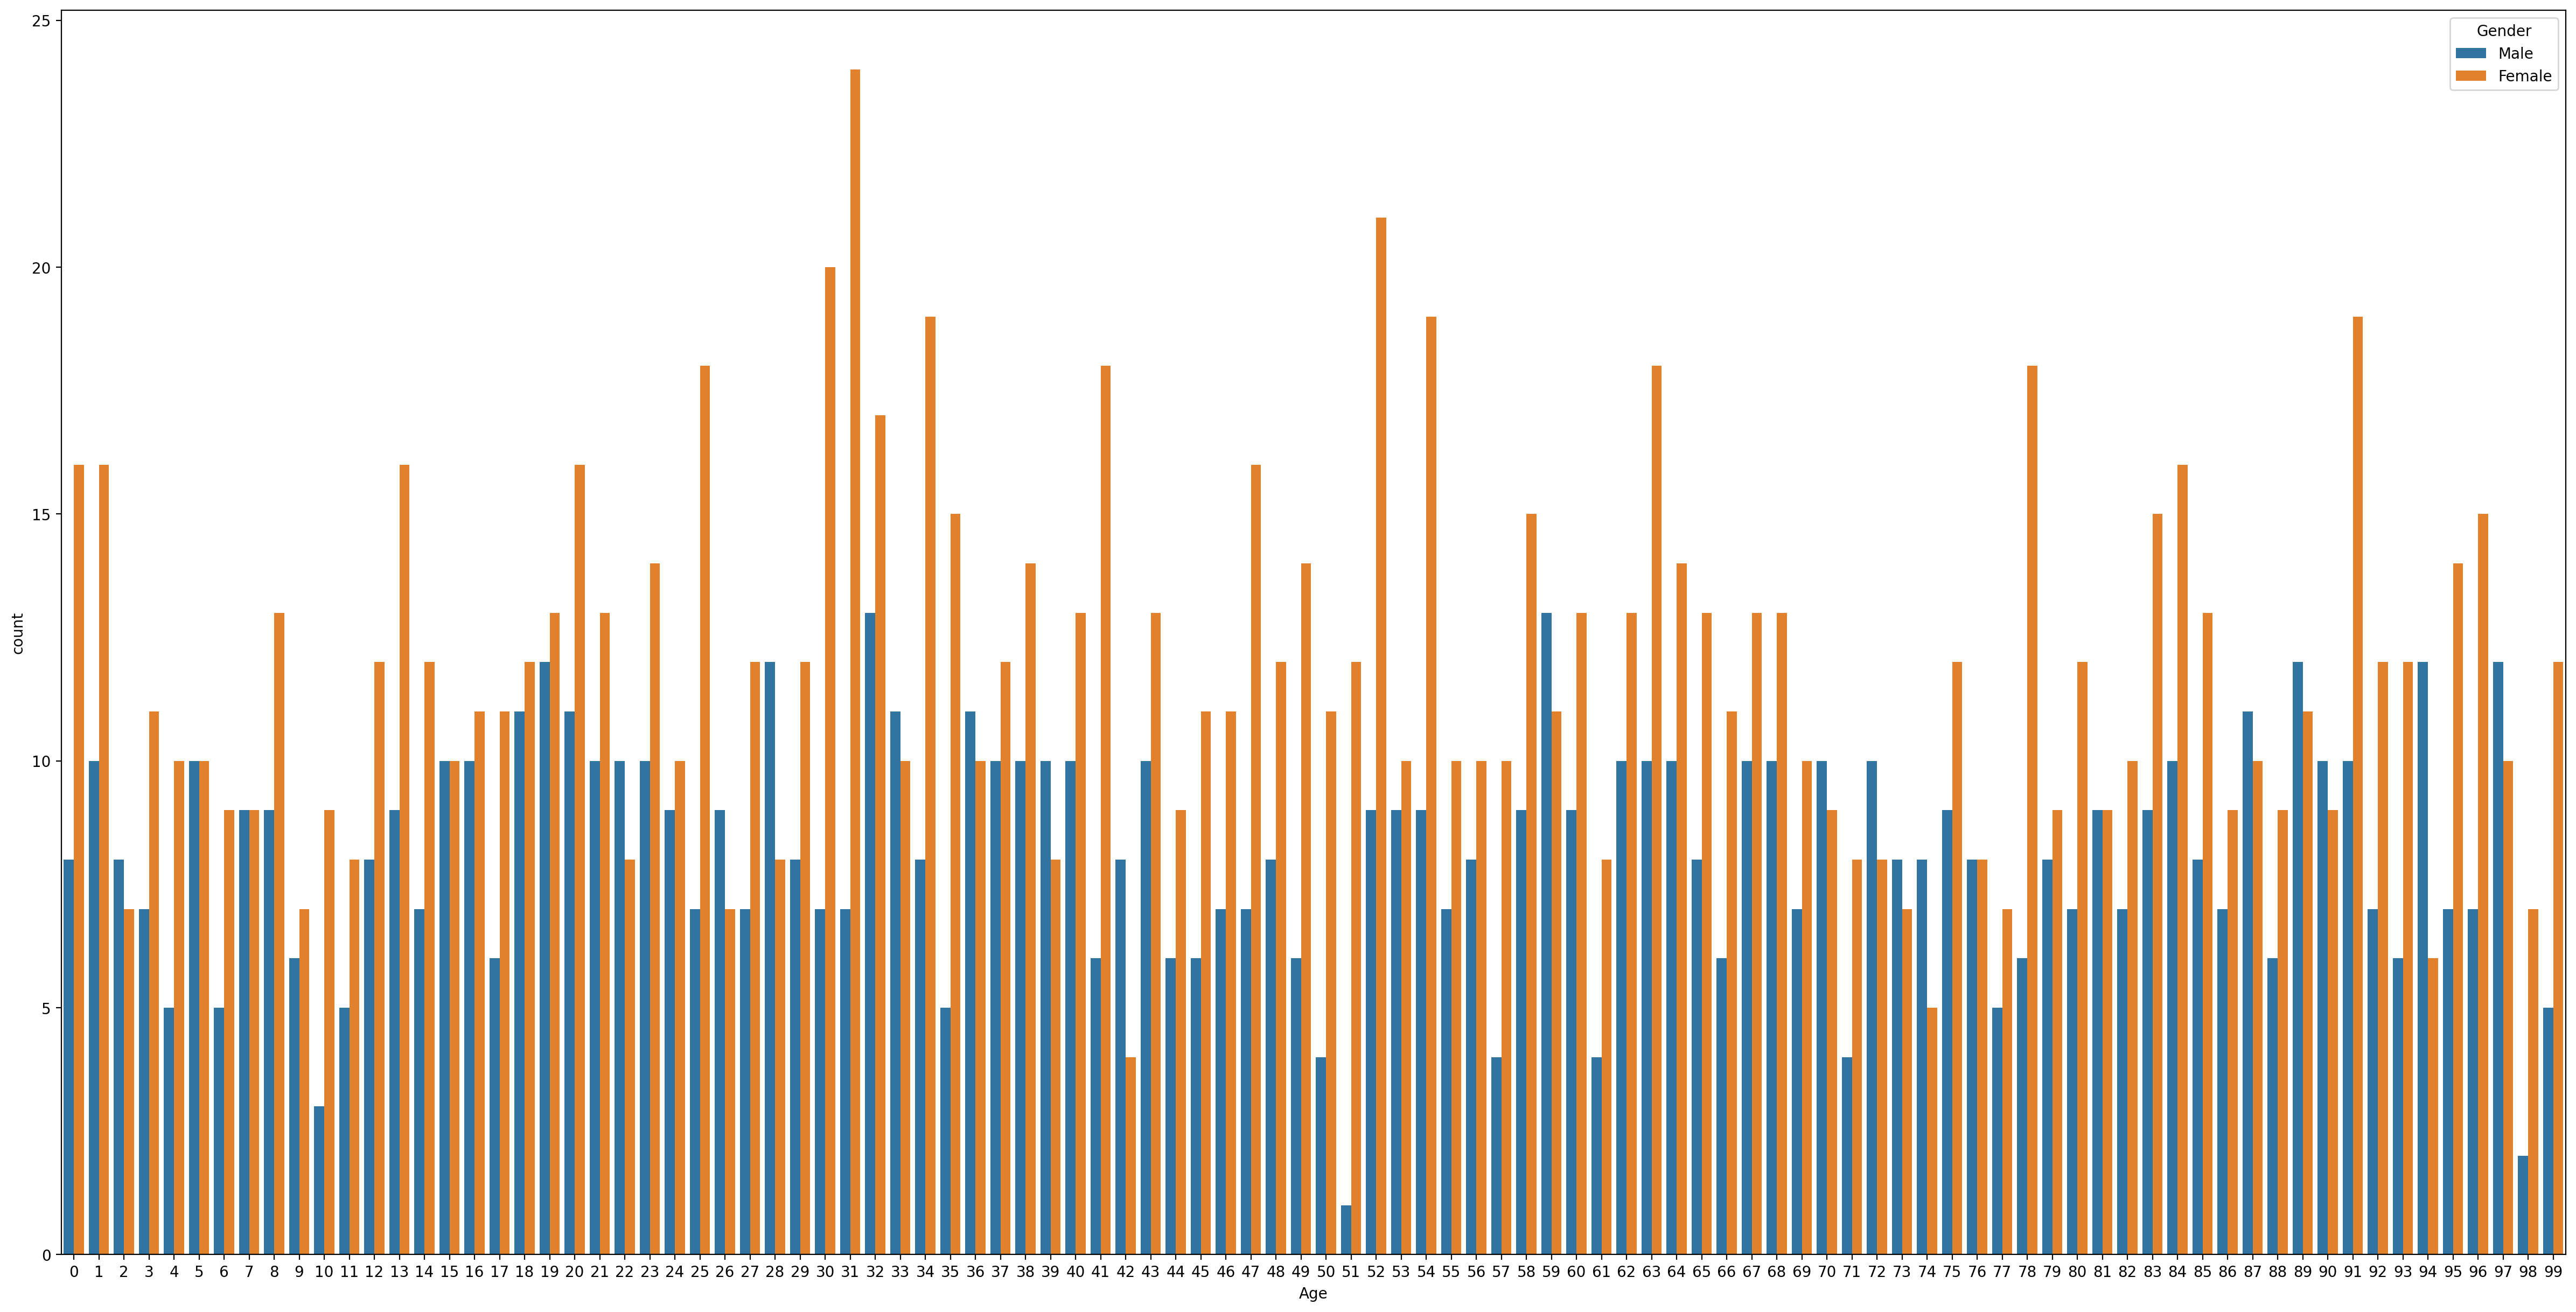

In [135]:
# Number of Male and Female Age based on the field
plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Age",hue="Gender");

#性別 與 年齡 比例關係圖

In [136]:
#group by Profession
group_Profession = customer_data.groupby('Profession').agg(['min','max'])

#count the minimum, average and maximum Income of every Prefession
Income_result = group_Profession['Annual Income ($)']
print("Profession Minimum and Maximum Income :\n", round(Income_result))

#職業 薪資 數據

Profession Minimum and Maximum Income :
                  min     max
Profession                  
Artist             0  189709
Doctor             0  189672
Engineer        7000  189974
Entertainment   1000  186882
Executive       4000  189630
Healthcare      3000  189689
Homemaker      29000  188696
Lawyer          3000  189650
Marketing       5000  186069


In [137]:
#count the minimum, average and maximum Spending Score of every Prefession
Income_result_Spend = group_Profession['Spending Score (1-100)'].agg(['min','mean','max'])

print("Profession - Income data:\n", round(Income_result))
print("Profession - Spending Score data:\n", round(Income_result_Spend))

#職業 薪資與消費 關係

Profession - Income data:
                  min     max
Profession                  
Artist             0  189709
Doctor             0  189672
Engineer        7000  189974
Entertainment   1000  186882
Executive       4000  189630
Healthcare      3000  189689
Homemaker      29000  188696
Lawyer          3000  189650
Marketing       5000  186069
Profession - Spending Score data:
       min    max
min   0.0   98.0
mean  1.0  100.0
max   2.0  100.0


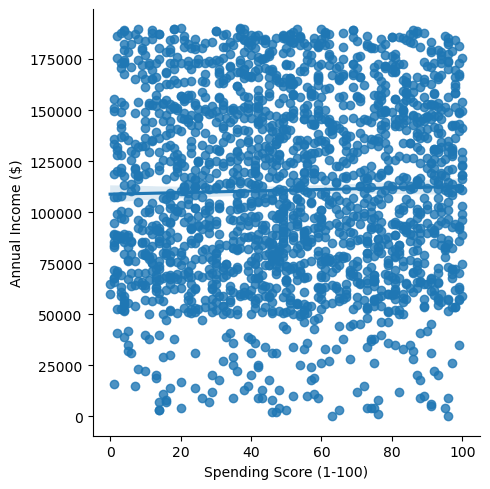

In [138]:
sns.lmplot(x='Spending Score (1-100)', y='Annual Income ($)', data=customer_data);

#薪資與消費 關係

Unique values in the Spending Score column :  101


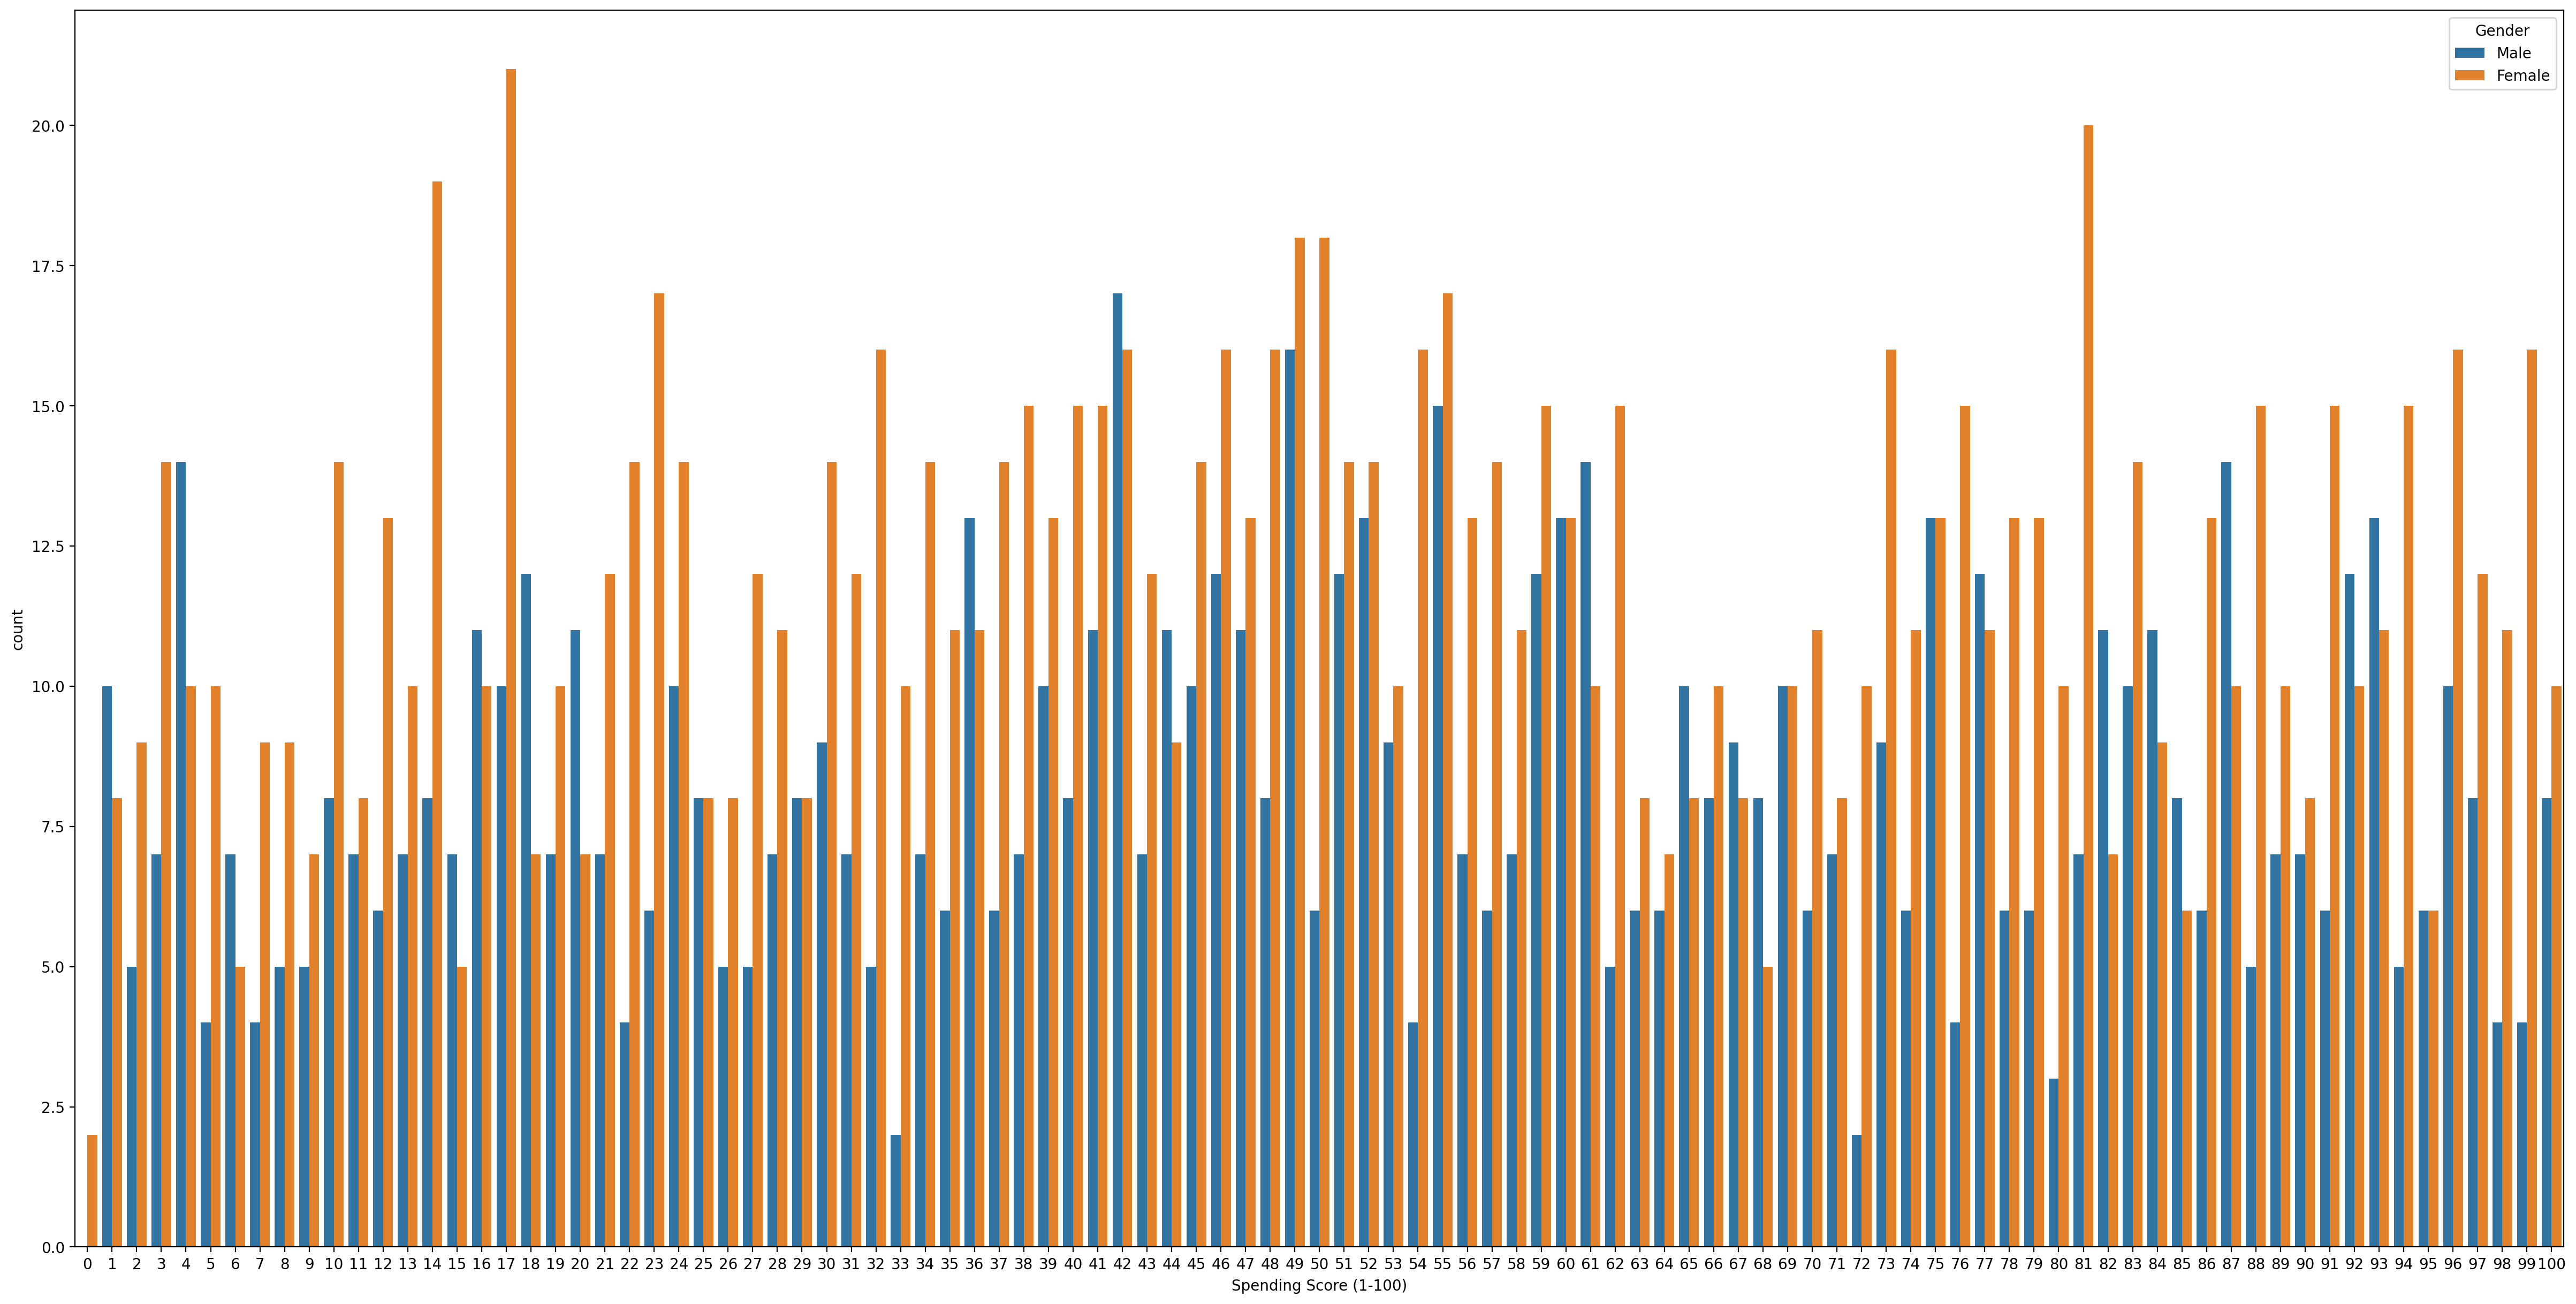

In [141]:
# Spending Score based on the Male and Female Count
print("Unique values in the Spending Score column : ",len(customer_data["Spending Score (1-100)"].unique()))

plt.figure(figsize=(30,15),dpi=200)
sns.countplot(data = customer_data,x="Spending Score (1-100)",hue="Gender");

#性別 與 消費 關係圖

In [142]:
#count the minimum, average and maximum Family Size of every Prefession
Income_result_FamiSize = group_Profession['Family Size'].agg(['min','max','median','mean','std','var'])

print("Profession - Family Size data :\n", round(Income_result_FamiSize))

#職業 家庭規模 數據

Profession - Family Size data :
         min  max
min     1.0  7.0
max     1.0  9.0
median  1.0  7.0
mean    1.0  8.0
std     0.0  1.0
var     0.0  1.0


In [143]:
#count the minimum, average and maximum Family Size of every Prefession
Income_result_WorkExperience = group_Profession['Work Experience'].agg(['min','max','median','mean','std','var'])

print("Profession - Work Experience data :\n", round(Income_result_WorkExperience))

#職業 工作經驗 數據

Profession - Work Experience data :
         min   max
min     0.0  14.0
max     0.0  17.0
median  0.0  16.0
mean    0.0  16.0
std     0.0   1.0
var     0.0   1.0


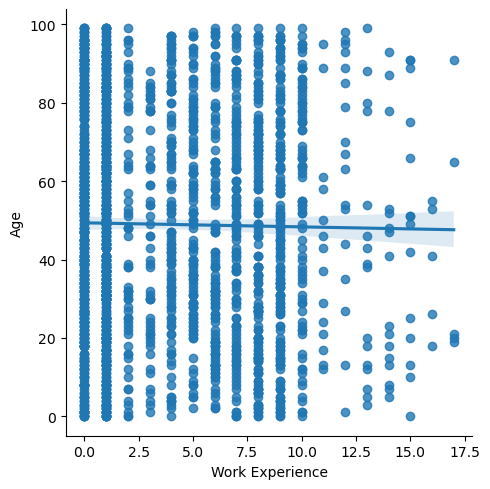

In [144]:
sns.lmplot(x='Work Experience', y='Age', data=customer_data);

#工作經驗與年齡 關係圖

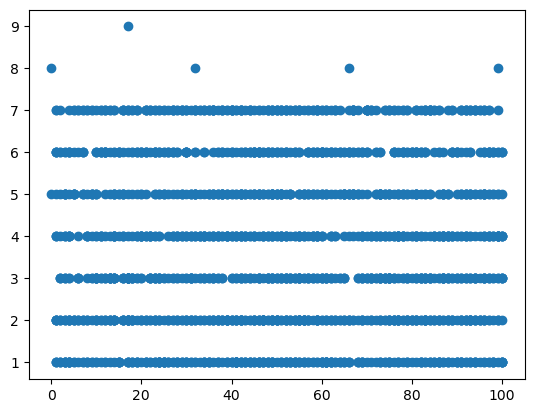

In [145]:
plt.scatter(x='Spending Score (1-100)', y='Family Size', data=customer_data)
plt.show()

#家庭規模與消費 關係圖

# Part 2

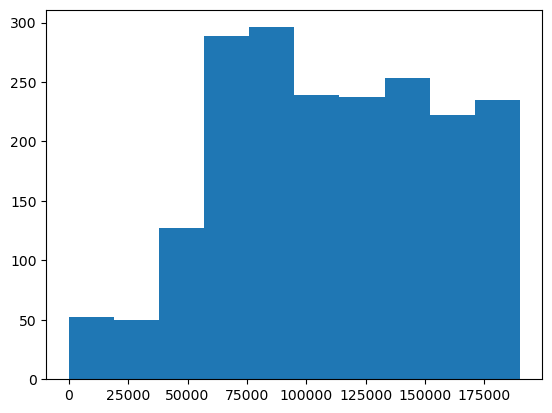

In [146]:
plt.hist(x = customer_data['Annual Income ($)']);
#薪資分布數據

---薪資分布算是接近常態，但低薪者較少，以這份數據來說，可能是因為侷限在10種職業類型，多以較高薪資標準的家庭進行調查

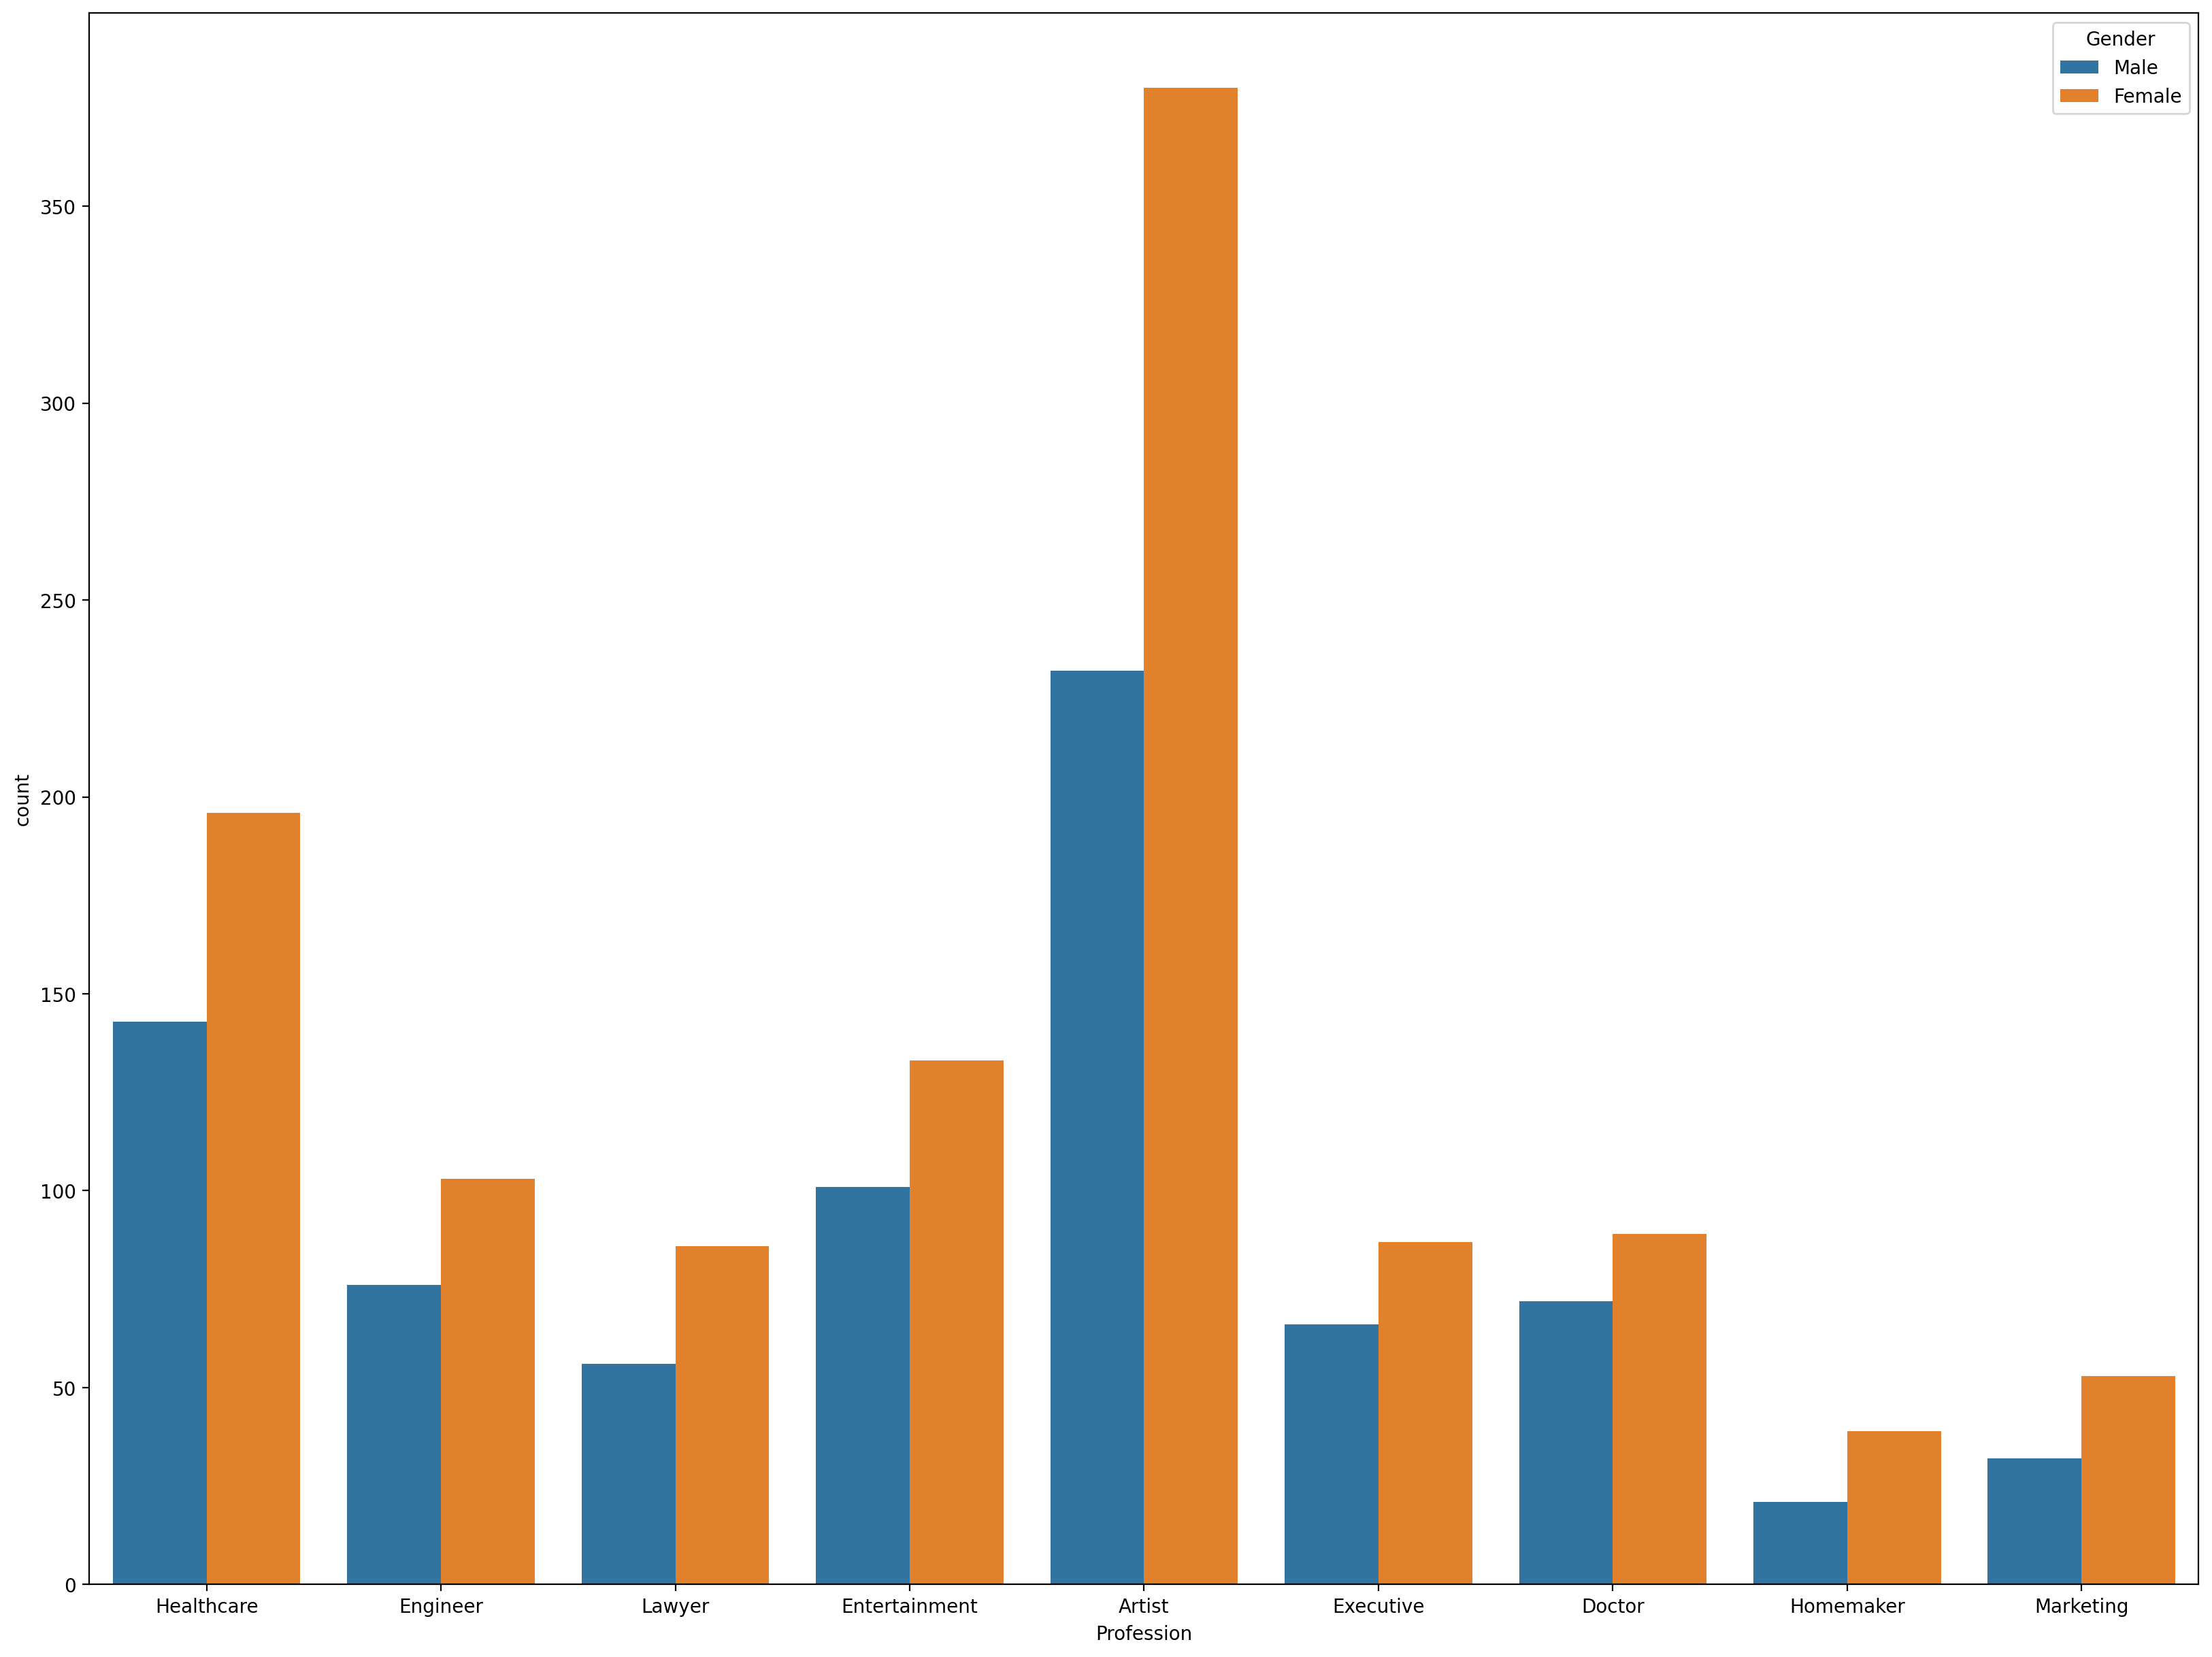

In [150]:
# Number of Male and Female Professions based on the field
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = customer_data,x="Profession",hue="Gender");

#性別 與 職業 人數比例關係

#####畫不出比例圖 無法normalize#####

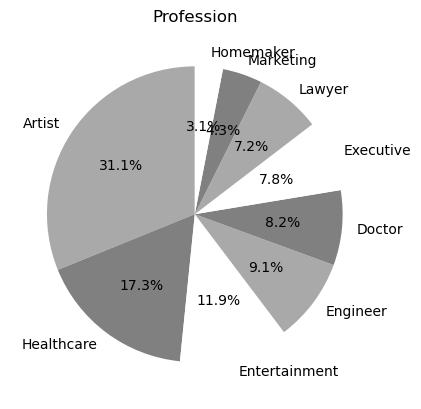

In [151]:
profession_counts = customer_data["Profession"].value_counts()
labels = ['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Executive', 'Lawyer', 'Marketing', 'Homemaker']

plt.pie(profession_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkgrey', 'grey', 'white'])
plt.title('Profession')
plt.show()



---以這2000份數據不分性別討論，最多人擔任藝術家(畫家、藝人)、衛生保健、娛樂產業作為職業類型，最少從事行銷以及家庭主婦(夫)

分開討論男性及女性職業選擇
男性從事理科類型工作較多，文科較少
女性做為藝術家和從事衛生保健類的人較多

男女比例相差較大的是藝術家，數量較均衡的是醫生

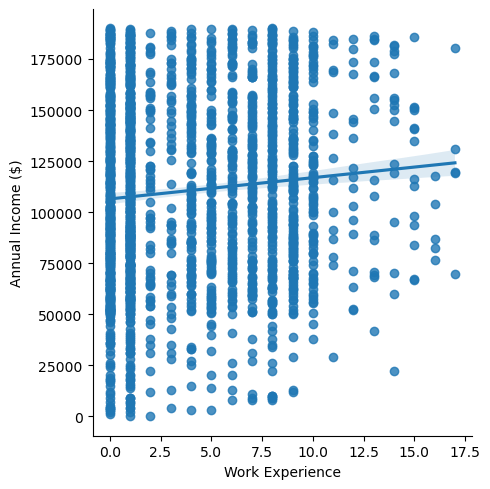

In [152]:
sns.lmplot(x='Work Experience', y='Annual Income ($)', data=customer_data)

#工作經驗與薪資 關係圖

---根據圖中的迴歸線，工作經驗與薪資多寡，成微幅正相關